## ***Stress Detection***
 Using Text.

***Importng Libraries And Datasset***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("preprocessedNPShuffled.csv")
data.columns = ['text', 'label']

In [2]:
data.head(5)

,text,label
0,Thank you happy.1,0
1,That would be a great trick happy.3,0
2,unhappy every time laughing my ass off,1
3,have a blast okay. love you!,1
4,Enjoy happy,0


In [3]:
# data.drop('useless',axis=1,inplace=True)

## ***Checking the Dataset***
(For Data wrangling it is done in the )

In [4]:
data

,text,label
0,Thank you happy.1,0
1,That would be a great trick happy.3,0
2,unhappy every time laughing my ass off,1
3,have a blast okay. love you!,1
4,Enjoy happy,0
...,...,...
2298,does it have flip out scr,1
2299,but happy birthday hoe! have a good day,0
2300,instant message perfectly fine :D how about yo...,0
2301,I lost one import quizzz unhappy,1


In [5]:
import nltk
import re
# nltk.download('stopwords')
# stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    # text = [stemmer.stem(word) for word in text.split(' ')]
    return text
data["text"] = data["text"].apply(clean)


In [6]:
data.head()

,text,label
0,thank,0
1,would great trick,0
2,unhappy every time laughing ass,1
3,blast okay love,1
4,enjoy happy,0


In [7]:
# def remove(text):
#     text=" ".join(text.split('   '))
#     return text    

# data["text"] = data["text"].apply(remove)

In [8]:
data

,text,label
0,thank,0
1,would great trick,0
2,unhappy every time laughing ass,1
3,blast okay love,1
4,enjoy happy,0
...,...,...
2298,flip scr,1
2299,happy birthday hoe good day,0
2300,instant message perfectly fine fellow ken,0
2301,lost one import quizzz unhappy,1


***Now, Labeling the the Text, [Stress,No Stress]***

In [9]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                               text      label
0                            thank   No Stress
1                would great trick   No Stress
2  unhappy  every time laughing ass     Stress
3                   blast okay love     Stress
4                       enjoy happy  No Stress


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33,random_state=42)

In [11]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
model = BernoulliNB()
model.fit(xtrain, ytrain)
# print("Accuracy of Logistic Regression model is:",
# metrics.accuracy_score(ytest, ytrain)*100)

BernoulliNB()

In [12]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

['No Stress']


In [13]:
scores = []
scores.append(model.score(xtest,ytest))
# scoresdf
# dict = {'Algorithm':'Naive Bayes','Score':model.score(xtest,ytest)}
# scoresdf  = scoresdf.append(dict, ignore_index = True)
model.score(xtest,ytest)*100


88.94736842105263

In [14]:
from sklearn.metrics import classification_report
pred_bern = model.predict(xtest)
print(classification_report(ytest, pred_bern))

              precision    recall  f1-score   support

   No Stress       0.91      0.89      0.90       423
      Stress       0.87      0.89      0.88       337

    accuracy                           0.89       760
   macro avg       0.89      0.89      0.89       760
weighted avg       0.89      0.89      0.89       760



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_bern)

array([[377,  46],
       [ 38, 299]], dtype=int64)

In [16]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(xtrain,ytrain)

LogisticRegression()

In [17]:
scores.append(model2.score(xtest,ytest))
dict = {'Algorithm':'LogisticRegression','Score':model2.score(xtest,ytest)}
model2.score(xtest,ytest)*100
# scoresdf  = scoresdf.append(dict, ignore_index = True)

91.44736842105263

In [18]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model2.predict(data)
print(output)

['No Stress']


In [19]:
from sklearn.metrics import confusion_matrix
pred_logis = model2.predict(xtest)
confusion_matrix(ytest,pred_logis)

array([[415,   8],
       [ 57, 280]], dtype=int64)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [21]:
scores.append(model3.score(xtest,ytest))
model3.score(xtest,ytest)*100

92.10526315789474

In [22]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model3.predict(data)
print(output)

['No Stress']


In [23]:
pred_decs = model3.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_decs)

array([[410,  13],
       [ 47, 290]], dtype=int64)

Text(69.0, 0.5, 'truth')

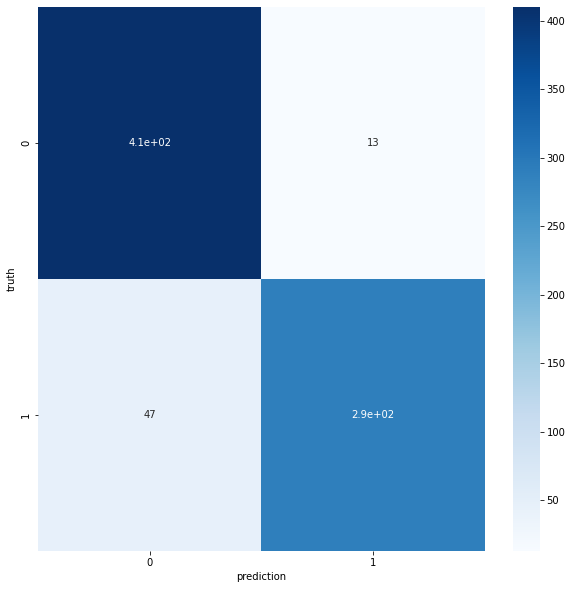

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(ytest,pred_decs),annot=True,cmap='Blues')
plt.xlabel('prediction')
plt.ylabel('truth')

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model4= KNeighborsClassifier()
model4.fit(xtrain,ytrain)

KNeighborsClassifier()

In [26]:
scores.append(model4.score(xtest,ytest))
model4.score(xtest,ytest)*100

88.81578947368422

In [27]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model4.predict(data)
print(output)

['No Stress']


In [28]:
pred_knn = model4.predict(xtest)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_knn)

array([[405,  18],
       [ 67, 270]], dtype=int64)

In [30]:
from sklearn.svm import SVC
model5 = SVC(C=2)
model5.fit(xtrain,ytrain)

SVC(C=2)

In [31]:
model5.score(xtest,ytest)*100

91.71052631578948

In [32]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model5.predict(data)
print(output)

['No Stress']


In [33]:
pred_svm=model5.predict(xtest)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_svm)

array([[419,   4],
       [ 59, 278]], dtype=int64)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier()
model6.fit(xtrain,ytrain)

RandomForestClassifier()

In [36]:
model6.score(xtest,ytest)

0.9171052631578948

In [37]:
pred_rand = model6.predict(xtest)

In [38]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model6.predict(data)
check = output
print(output)

['No Stress']


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_rand)

array([[412,  11],
       [ 52, 285]], dtype=int64)

In [40]:
dict = {'Algo':['NaiveBayes','LogisticRegression','DecisionTree','KNN','SVC','RandomForest'],
        'Score':[model.score(xtest,ytest),model2.score(xtest,ytest),model3.score(xtest,ytest),model4.score(xtest,ytest),
                 model5.score(xtest,ytest),model6.score(xtest,ytest)]}
scoresdf = pd.DataFrame.from_dict(dict)

In [41]:
scoresdf

,Algo,Score
0,NaiveBayes,0.889474
1,LogisticRegression,0.914474
2,DecisionTree,0.921053
3,KNN,0.888158
4,SVC,0.917105
5,RandomForest,0.917105
